# Introduction to Python for Data Science Final Project 3: Ensemble

## Introduction

### Team Member:
1. Qaris Ardian Pratama

### Abstract
Cardiovascular disease (CVDs) merupakan penyebab kematian nomor 1 di dunia, dengan angka kematian sekitar 17.9 juta per tahun. Jumlah itu merupakan 31% dari penyebab kematian di seluruh dunia. CVDs merupakan penyebab paling umum dari gagal jantung.

Sebagian besar penyakit cardiovascular dapat dicegah dengan mengubah gaya hidup seperti rokok, pola makan, aktivitas fisik, alkohol, dll. Orang dengan CVDs atau dengan resiko CVDs tinggi perlu dideteksi sejak dini. Oleh karena itu, pemanfaatan machine learning di sini dapat menyelamatkan nyawa.

Dataset diambil dari Kaggle berjudul Heart Failure Prediction dengan 12 feature, yaitu age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, dan sex.

### Objective
Tujuan dari analisis ini adalah sebagai berikut.
1. Mampu memahami konsep Classification dengan Ensemble Model.
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pickle
import warnings
import datetime
import missingno as msno
import plotly.figure_factory as ff

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max.columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [22]:
df = pd.read_csv('../../../../data_set/heart_failure_clinical_records_dataset.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

**Keterangan**
<br>
Terdapat 299 baris data dan 13 kolom pada dataset heart_failure_clinical_records

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Keterangan**
<br>
Pada feature creatinine_phosphokinase terlihat jarak yang sangat jauh antara 75% dan max, perlu diselidiki apakah terdapat outlier di sana

## Data Cleaning

In [12]:
print('Jumlah missing value: ', df.isna().sum().sum())

Jumlah missing value:  0


In [13]:
print('Jumlah duplicated value: ', df.duplicated().sum())

Jumlah duplicated value:  0


**Keterangan**
<br>
Dataset ini tidak memiliki missing value maupun duplicated value

In [24]:
df_clean = df.rename(columns={
    'creatinine_phosphokinase': 'cpk_level',
    'DEATH_EVENT': 'death_event'
})
df_clean.head()

,age,anaemia,cpk_level,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Keterangan**
<br>
Dua nama kolom diubah untuk mempermudah pengerjaan, yaitu creatinine_phosphokinase menjadi cpk_level dan DEATH_EVENT menjadi death_event.

## EDA and Visualization

### Dividing Feature

In [34]:
col = list(df_clean.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df_clean[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking death_event
Numerical Features : age cpk_level ejection_fraction platelets serum_creatinine serum_sodium time


**Keterangan**
<br>
Suatu feature dianggap categorical saat unique value kurang dari 6. Lebih dari itu, maka feature akan dianggap numerical.

In [36]:
df_clean['age'] = df_clean['age'].astype(int)
df_clean['platelets'] = df_clean['platelets'].astype(int)
df1 = df_clean.copy(deep = True)
df1.head()

,age,anaemia,cpk_level,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


### Categorical Feature

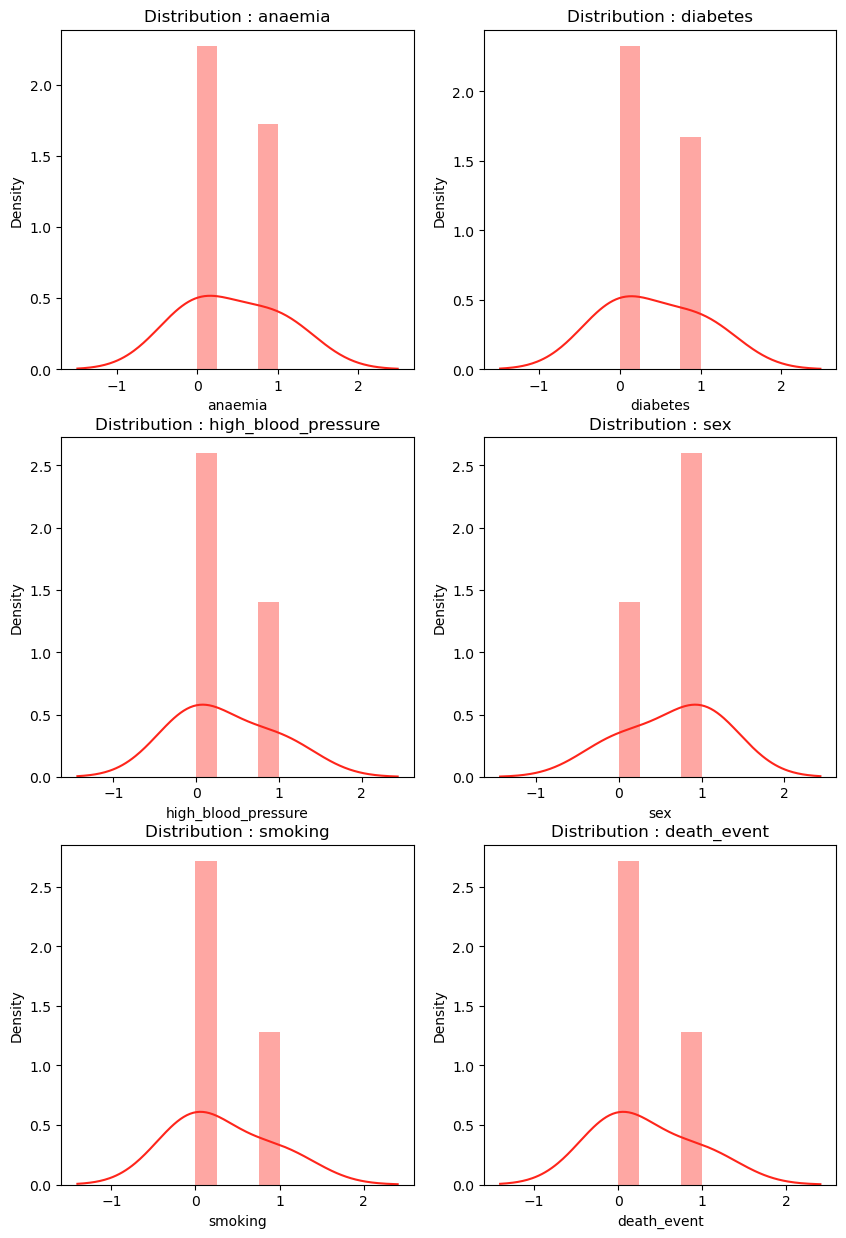

In [38]:
colors = ['#FE251B','#FFFFFF']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

**Keterangan**
<br>
Distribusi dari categorical feature sudah ternormalisasi.

### Numerical Features

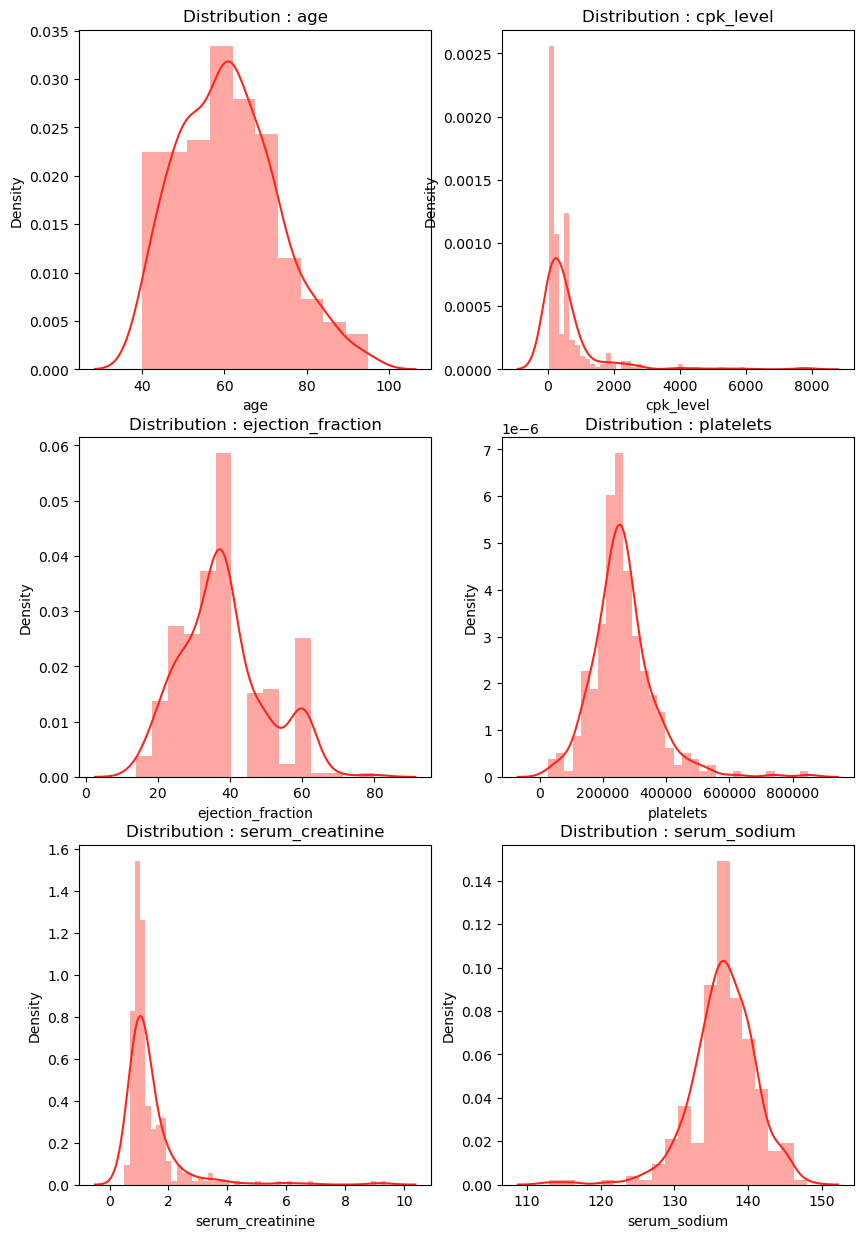

Text(0.5, 1.0, 'Distribution : time')

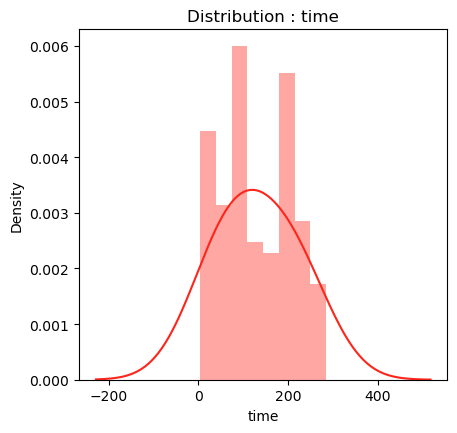

In [40]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title)

**Keterangan**
<br>
1. age, cpk_level, ejection_fraction, dan serum_creatinine memiliki skewed positive data distribution.
2. platelets dan serum_sodium sudah mendekati normal distribution.